<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/knn_stock_model(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%pip isntall path
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


ERROR: unknown command "isntall" - maybe you meant "install"


In [49]:
file_path = Path("IBM.csv")
df = pd.read_csv(file_path)

if(df.value_counts().min()<10):
  df=df[df.FutureTrend!="Neutral"].dropna()
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
749,23/06/2021,146.429993,146.500000,144.570007,144.610001,3202600,0.020722,-1.242909,Negative,Positive,Negative,0,Negative
750,24/06/2021,145.800003,146.190002,144.690002,145.440002,3609700,0.500000,-0.246914,Negative,Negative,Negative,0,Negative
751,25/06/2021,145.380005,146.929993,144.949997,146.839996,3594200,0.954547,1.004259,Positive,Negative,Positive,0,Positive
752,28/06/2021,147.009995,147.300003,144.910004,145.289993,3888900,0.158992,-1.169989,Negative,Positive,Negative,0,Negative
753,29/06/2021,145.259995,146.740005,145.100006,145.550003,2428500,0.274388,0.199648,Negative,Negative,Positive,0,Negative


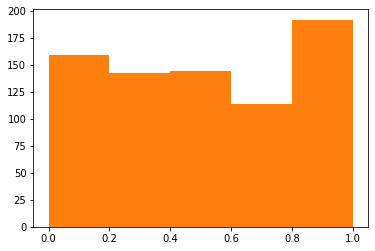

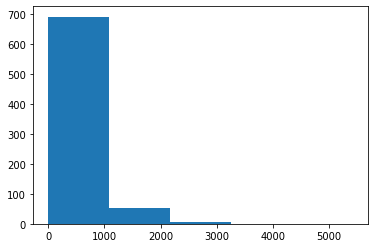

[   0.         1807.66666667 3615.33333333 5423.        ]


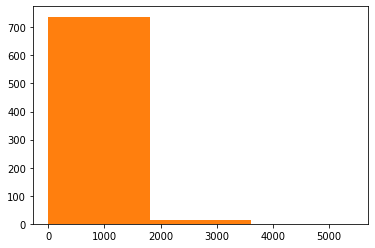

In [50]:


import matplotlib.pyplot as plt
mpgs = df['EF_1']
plt.hist(mpgs, bins=5)
ef1_cut=plt.hist(mpgs, bins=5)[1]
plt.show()
import matplotlib.pyplot as plt
mpgs = df['Twitter Sentiments']
plt.hist(mpgs, bins=5)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)



def make_bins(df):
   label_names = ["Ef_1_v_low","Ef_1_low","Ef_1_v_med","Ef1_high", "Ef1_very_high" ]
   cut_points =ef1_cut
   df["EF_1_val"] = pd.cut(df["EF_1"], cut_points, labels=label_names)
   dummies = pd.get_dummies(df["EF_1_val"],drop_first=True)
   df = pd.concat([df, dummies], axis=1)
   label_names = ["setinent_neutral","sentiment_good","sentiment_bad"]
   cut_points =twitter_cut
   df["sentiments"]=pd.cut(df['Twitter Sentiments'], cut_points, labels=label_names)
   dummies1 = pd.get_dummies(df["sentiments"],drop_first=True)
   df = pd.concat([df, dummies1], axis=1)
   df.drop(["EF_1_val","sentiments"],axis=1,inplace=True)
   return df
def calculate_ema(prices, days, smoothing=2):
      ema = [sum(prices[:days]) / days]
      for price in prices[days:]:
          ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
      return ema

In [51]:
df.head()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
0,02/07/2018,138.279999,140.220001,138.199997,139.860001,3405400,0.821782,1.142611,Positive,Negative,Positive,574,Positive
1,03/07/2018,140.649994,140.940002,139.369995,139.570007,1963200,0.127396,-0.767854,Neutral,Neutral,Negative,720,Negative
2,05/07/2018,140.479996,141.429993,139.929993,141.429993,3744700,1.000000,0.676251,Negative,Positive,Positive,906,Negative
3,06/07/2018,141.529999,142.940002,141.169998,142.479996,2849000,0.740110,0.671234,Negative,Negative,Positive,837,Negative
4,09/07/2018,142.589996,144.720001,142.470001,144.389999,3904700,0.853333,1.262363,Negative,Positive,Positive,714,Negative


In [52]:
target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])



appl_df=df
appl_df.set_index('Date',inplace=True)
appl_df = make_bins(df)
appl_df.head(2)
appl_df=appl_df.drop(["Twitter Sentiments"],axis =1)
appl_df['diff']=appl_df['Close']-appl_df['Open']
appl_df['10day']=appl_df['Close'].rolling(10).mean()
appl_df['10day'].fillna(appl_df['10day'][9],inplace=True)
appl_df['Volume']=np.log(appl_df['Volume'])
ema = calculate_ema(appl_df['Close'], 10)
appl_df=appl_df[9:]
target=target[9:]
appl_df['ema']=ema
appl_df['signal']=appl_df['ema']>appl_df['Close']

del (appl_df['Open'])
del (appl_df['Close'])
del (appl_df['High'])
del (appl_df['EF_2'])

appl_df.head()

,Low,Volume,EF_1,Oil FutureTrend,Gold FutureTrend,Trend,Ef_1_low,Ef_1_v_med,Ef1_high,Ef1_very_high,sentiment_good,sentiment_bad,diff,10day,ema,signal
Date,,,,,,,,,,,,,,,,
16/07/2018,144.210007,15.059319,0.791146,Negative,Positive,Negative,0,0,1,0,0,0,-0.209992,143.519000,143.519000,False
17/07/2018,143.339996,15.444104,0.090367,Negative,Negative,Negative,0,0,0,0,0,0,-1.259995,143.882001,143.513728,True
18/07/2018,142.740005,15.752135,0.864078,Negative,Positive,Positive,0,0,0,1,1,0,1.010010,144.377000,143.696688,False
19/07/2018,147.250000,16.500347,0.604866,Negative,Negative,Positive,0,0,1,0,0,0,1.389999,145.158002,144.704564,False
20/07/2018,146.259995,15.674087,0.034620,Positive,Positive,Negative,0,0,0,0,0,0,-2.229996,145.545003,145.003735,False


In [53]:
new_df=appl_df

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)
print(categorical_columns)

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])
new_df=preprocessor.fit_transform(new_df)
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2, random_state=4)


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

model.fit(X_train,y_train)

['Oil FutureTrend', 'Gold FutureTrend', 'Trend']


KNeighborsClassifier()

In [54]:
X_test[0]


array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.74027222,
       -0.74179766, -1.260536  , -0.48819395, -0.48607909, -0.42130279,
       -0.58408495, -0.13344744, -0.03671115, -0.32942713,  0.51057164,
        0.52800617, -0.87216025])

In [55]:
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test, 
        y_test)))

Accuracy score (training): 0.678
Accuracy score (validation): 0.591


In [56]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

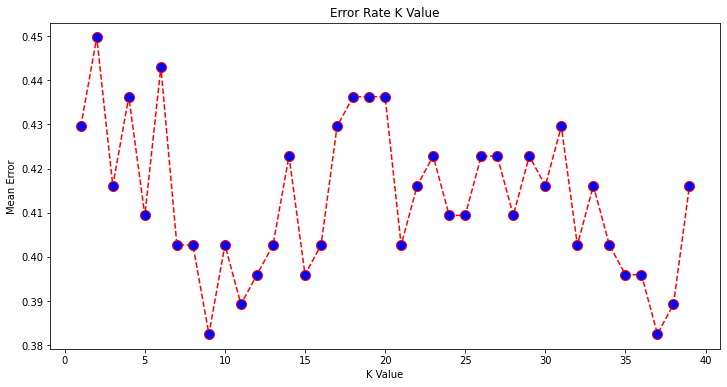

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [58]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

model.fit(X_train,y_train)
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test, 
        y_test)))

Accuracy score (training): 0.678
Accuracy score (validation): 0.591
